In [ ]:
!wget https://raw.githubusercontent.com/NLP-kr/tensorflow-ml-nlp-tf2/master/requirements.txt -O requirements.txt
!pip install -r requirements.txt
!pip install tensorflow==2.2.0

--2021-08-01 16:35:28--  https://raw.githubusercontent.com/NLP-kr/tensorflow-ml-nlp-tf2/master/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 610 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     610  --.-KB/s    in 0s      

2021-08-01 16:35:29 (50.8 MB/s) - ‘requirements.txt’ saved [610/610]

     |████████████████████████████████| 17.3 MB 30 kB/s 
     |████████████████████████████████| 1.4 MB 54.6 MB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |████████████████████████████████| 769 kB 49.4 MB/s 
     |████████████████████████████████| 1.0 MB 48.9 MB/s 
     |████████████████████████████████| 46.9 MB 43 kB/s 
     |████████████████████████████████| 252 kB 69.5 MB/s 
     |█

In [ ]:
!mkdir -p data_in/KOR/NER
!wget https://raw.githubusercontent.com/NLP-kr/tensorflow-ml-nlp-tf2/master/7.PRETRAIN_METHOD/data_in/KOR/NER/label.txt \
        -O data_in/KOR/NER/label.txt
!wget https://raw.githubusercontent.com/NLP-kr/tensorflow-ml-nlp-tf2/master/7.PRETRAIN_METHOD/data_in/KOR/NER/test.tsv \
        -O data_in/KOR/NER/test.tsv
!wget https://raw.githubusercontent.com/NLP-kr/tensorflow-ml-nlp-tf2/master/7.PRETRAIN_METHOD/data_in/KOR/NER/train.tsv \
        -O data_in/KOR/NER/train.tsv

--2021-08-01 16:37:32--  https://raw.githubusercontent.com/NLP-kr/tensorflow-ml-nlp-tf2/master/7.PRETRAIN_METHOD/data_in/KOR/NER/label.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 173 [text/plain]
Saving to: ‘data_in/KOR/NER/label.txt’

data_in/KOR/NER/lab 100%[===================>]     173  --.-KB/s    in 0s      

2021-08-01 16:37:33 (10.2 MB/s) - ‘data_in/KOR/NER/label.txt’ saved [173/173]

--2021-08-01 16:37:33--  https://raw.githubusercontent.com/NLP-kr/tensorflow-ml-nlp-tf2/master/7.PRETRAIN_METHOD/data_in/KOR/NER/test.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
H

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer

In [ ]:
# 데이터 불러오기
DATA_IN_PATH = 'data_in/KOR'
DATA_TRAIN_PATH = os.path.join(DATA_IN_PATH, "NER", "train.tsv")
DATA_TEST_PATH = os.path.join(DATA_IN_PATH, "NER", "test.tsv")
DATA_LABEL_PATH = os.path.join(DATA_IN_PATH, "NER", "label.txt")

In [ ]:
def read_file(input_path):
    """Read tsv file, and return words and label as list"""
    with open(input_path, "r", encoding="utf-8") as f:
        sentences = []
        labels = []
        for line in f:
            split_line = line.strip().split("\t")
            sentences.append(split_line[0])
            labels.append(split_line[1])
        return sentences, labels
    
train_sentences, train_labels = read_file(DATA_TRAIN_PATH)
test_sentences, test_labels = read_file(DATA_TEST_PATH)
ner_sentences = train_sentences + test_sentences
ner_labels = train_labels + test_labels

ner_dict = {"sentence": ner_sentences, "label": ner_labels}
ner_df = pd.DataFrame(ner_dict)

In [ ]:
print('전체 ner_data 개수: {}'.format(len(ner_df)))

전체 ner_data 개수: 90000


In [ ]:
train_set = pd.Series(ner_df["sentence"].tolist())
print('유일한 총 문장 수 : {}'.format(len(np.unique(train_set))))
print('반복해서 나타나는 문장의 수: {}'.format(np.sum(train_set.value_counts() > 1)))

유일한 총 문장 수 : 88703
반복해서 나타나는 문장의 수: 288


Text(0, 0.5, 'Number of sentence')

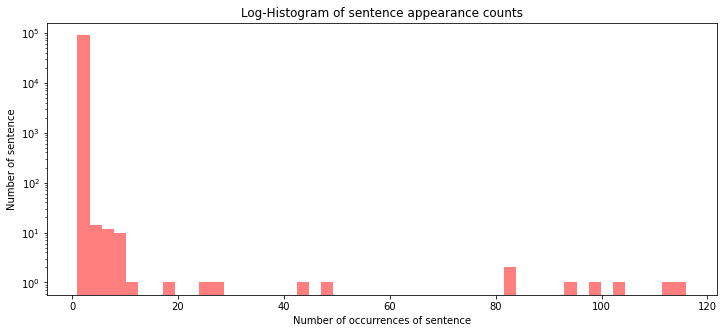

In [ ]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of sentence appearance counts')
# 그래프 x 축 라벨
plt.xlabel('Number of occurrences of sentence')
# 그래프 y 축 라벨
plt.ylabel('Number of sentence')

In [ ]:
print('중복 최대 개수: {}'.format(np.max(train_set.value_counts())))
print('중복 최소 개수: {}'.format(np.min(train_set.value_counts())))
print('중복 평균 개수: {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차: {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간길이: {}'.format(np.median(train_set.value_counts())))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 25)))
print('제 3 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 75)))

중복 최대 개수: 116
중복 최소 개수: 1
중복 평균 개수: 1.01
중복 표준편차: 0.92
중복 중간길이: 1.0
제 1 사분위 중복: 1.0
제 3 사분위 중복: 1.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f807b2cf150>],
 'caps': [<matplotlib.lines.Line2D at 0x7f807b334190>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f807b304710>],
 'means': [<matplotlib.lines.Line2D at 0x7f807b3041d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f807b334c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f807b2cf6d0>,
  <matplotlib.lines.Line2D at 0x7f807b2cfc10>]}

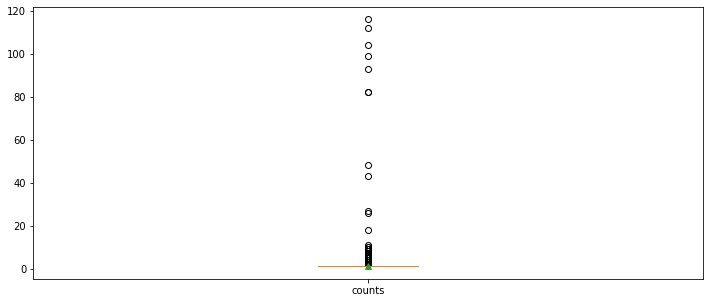

In [ ]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([train_set.value_counts()],
             labels=['counts'],
             showmeans=True)

In [ ]:
train_length = train_set.apply(len)

In [ ]:
train_set[0]

'금석객잔 여러분, 감사드립니다 .'

In [ ]:
train_length

0         18
1         39
2         60
3        125
4         18
        ... 
89995     19
89996     62
89997     22
89998     54
89999     50
Length: 90000, dtype: int64

In [ ]:
print('문장 길이 최대 값: {}'.format(np.max(train_length)))
print('문장 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('문장 길이 중간 값: {}'.format(np.median(train_length)))
print('문장 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('문장 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

문장 길이 최대 값: 1162
문장 길이 평균 값: 50.90
문장 길이 표준편차: 34.15
문장 길이 중간 값: 43.0
문장 길이 제 1 사분위: 29.0
문장 길이 제 3 사분위: 63.0


Text(0, 0.5, 'Probability')

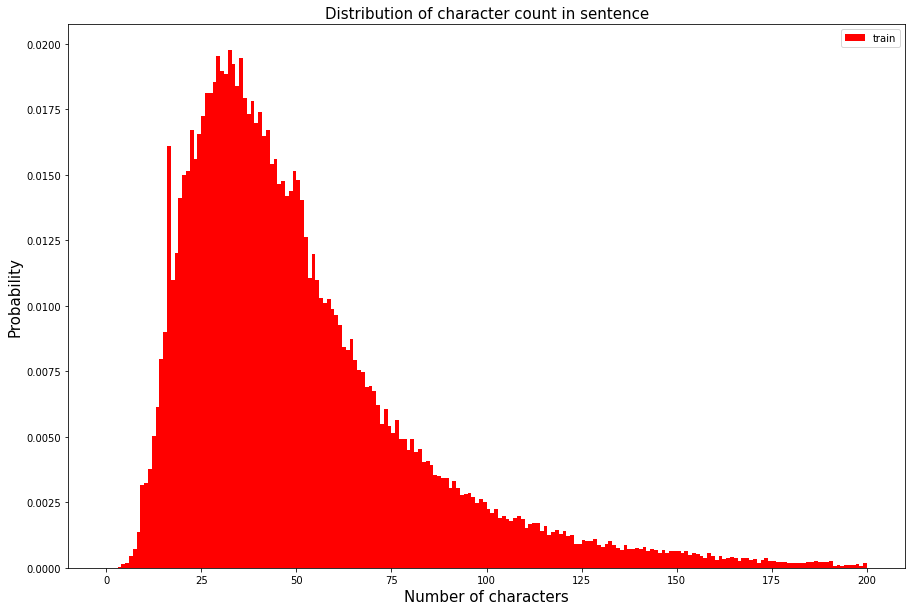

In [ ]:
plt.figure(figsize=(15, 10))
plt.hist(train_length, bins=200, range=[0,200], facecolor='r', density=True, label='train')
plt.title("Distribution of character count in sentence", fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

{'boxes': [<matplotlib.lines.Line2D at 0x7f807ab53dd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f807ab35e50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f807ab41410>],
 'means': [<matplotlib.lines.Line2D at 0x7f807ab3ae90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f807ab3a950>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f807ab353d0>,
  <matplotlib.lines.Line2D at 0x7f807ab35910>]}

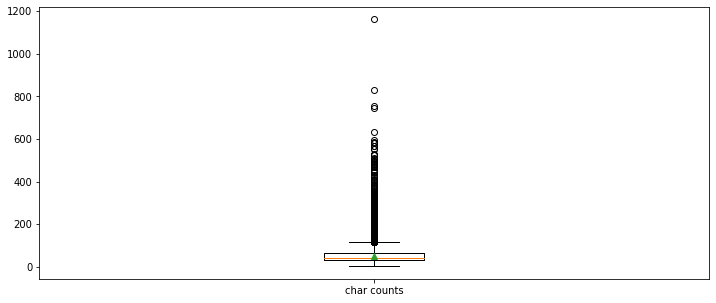

In [ ]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_length,
             labels=['char counts'],
             showmeans=True)

In [ ]:
train_word_counts = train_set.apply(lambda x:len(x.split(' ')))

print('문장 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('문장 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('문장 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('문장 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
print('문장 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('문장 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('문장 단어 개수 99 퍼센트: {}'.format(np.percentile(train_word_counts, 99)))

# 문장 단어 개수 최대 값: 175
# 문장 단어 개수 평균 값: 11.81
# 문장 단어 개수 표준편차: 7.03
# 문장 단어 개수 중간 값: 10.0
# 문장 단어 개수 제 1 사분위: 7.0
# 문장 단어 개수 제 3 사분위: 15.0
# 문장 단어 개수 99 퍼센트: 35.0

문장 단어 개수 최대 값: 175
문장 단어 개수 평균 값: 11.82
문장 단어 개수 표준편차: 7.03
문장 단어 개수 중간 값: 10.0
문장 단어 개수 제 1 사분위: 7.0
문장 단어 개수 제 3 사분위: 15.0
문장 단어 개수 99 퍼센트: 35.0


Text(0, 0.5, 'Probability')

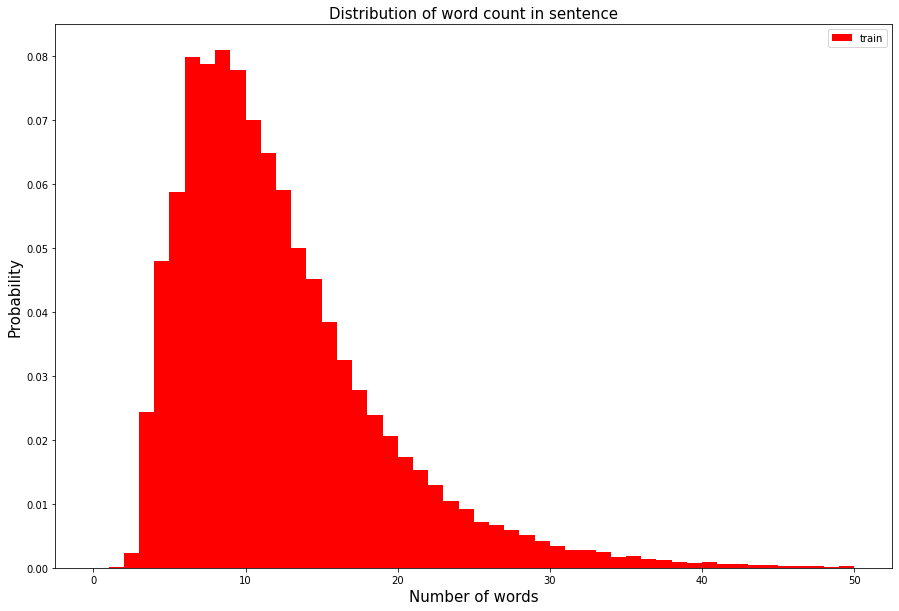

In [ ]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, range=[0, 50], facecolor='r', density=True, label='train')
plt.title('Distribution of word count in sentence', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

{'boxes': [<matplotlib.lines.Line2D at 0x7f807a9c8150>],
 'caps': [<matplotlib.lines.Line2D at 0x7f807a9ce1d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f807a9d7750>],
 'means': [<matplotlib.lines.Line2D at 0x7f807a9d7210>],
 'medians': [<matplotlib.lines.Line2D at 0x7f807a9cec90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f807a9c8710>,
  <matplotlib.lines.Line2D at 0x7f807a9c8c50>]}

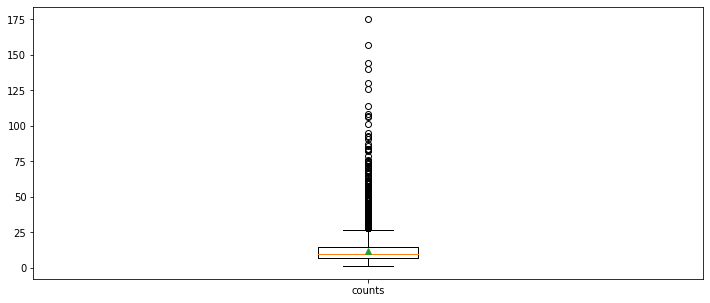

In [ ]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_word_counts,
             labels=['counts'],
             showmeans=True)

In [ ]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
math = np.mean(train_set.apply(lambda x: '[math]' in x)) # []
fullstop = np.mean(train_set.apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개

In [ ]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
math = np.mean(train_set.apply(lambda x: '[math]' in x)) # []
fullstop = np.mean(train_set.apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
                  
print('물음표가있는 문장: {:.2f}%'.format(qmarks * 100))
print('수학 태그가있는 문장: {:.2f}%'.format(math * 100))
print('마침표를 포함한 문장: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 문장: {:.2f}%'.format(capital_first * 100))
print('대문자가있는 문장: {:.2f}%'.format(capitals * 100))
print('숫자가있는 문장: {:.2f}%'.format(numbers * 100))

물음표가있는 문장: 2.24%
수학 태그가있는 문장: 0.00%
마침표를 포함한 문장: 84.92%
첫 글자가 대문자 인 문장: 2.87%
대문자가있는 문장: 16.65%
숫자가있는 문장: 41.61%


## Tokenizer cased

In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased", cache_dir='bert_ckpt', do_lower_case=False)

In [ ]:
train_bert_token_counts = train_set.apply(lambda x:len(tokenizer.tokenize(x)))

Text(0, 0.5, 'Probability')

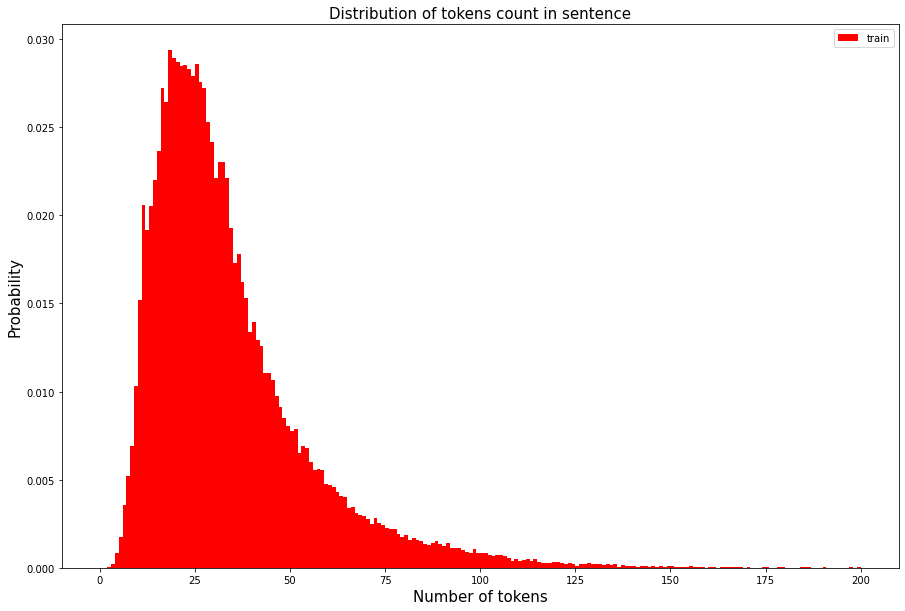

In [ ]:
plt.figure(figsize=(15, 10))
plt.hist(train_bert_token_counts, bins=200, range=[0, 200], facecolor='r', density=True, label='train')
plt.title('Distribution of tokens count in sentence', fontsize=15)
plt.legend()
plt.xlabel('Number of tokens', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [ ]:
print('문장 tokens 개수 최대 값: {}'.format(np.max(train_bert_token_counts)))
print('문장 tokens 개수 평균 값: {:.2f}'.format(np.mean(train_bert_token_counts)))
print('문장 tokens 개수 표준편차: {:.2f}'.format(np.std(train_bert_token_counts)))
print('문장 tokens 개수 중간 값: {}'.format(np.median(train_bert_token_counts)))
print('문장 tokens 개수 제 1 사분위: {}'.format(np.percentile(train_bert_token_counts, 25)))
print('문장 tokens 개수 제 3 사분위: {}'.format(np.percentile(train_bert_token_counts, 75)))
print('문장 tokens 개수 99 퍼센트: {}'.format(np.percentile(train_bert_token_counts, 99)))

문장 tokens 개수 최대 값: 850
문장 tokens 개수 평균 값: 33.62
문장 tokens 개수 표준편차: 22.76
문장 tokens 개수 중간 값: 28.0
문장 tokens 개수 제 1 사분위: 19.0
문장 tokens 개수 제 3 사분위: 41.0
문장 tokens 개수 99 퍼센트: 111.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f8079afc310>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8079aff390>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8079b028d0>],
 'means': [<matplotlib.lines.Line2D at 0x7f8079b023d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8079affe50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8079afc8d0>,
  <matplotlib.lines.Line2D at 0x7f8079afce10>]}

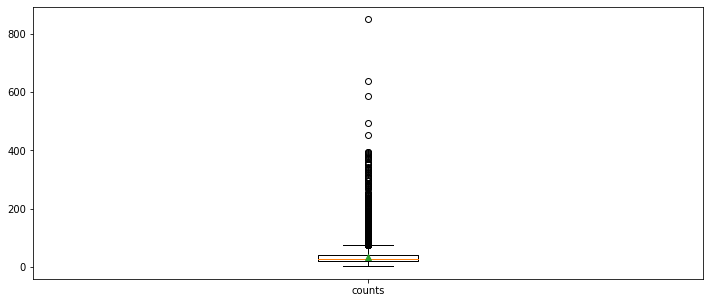

In [ ]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_bert_token_counts,
             labels=['counts'],
             showmeans=True)